<a href="https://colab.research.google.com/github/ysooch0819/AI16-Projects/blob/main/%5Bn411%5D%20%EA%B0%95%EC%9D%98%ED%81%B4%EB%A1%A0%EC%BD%94%EB%94%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 신경망을 이루는 가장 기본 단위: 퍼셉트론Perceptron
# 다수의 신호를 입력으로 받아 하나의 신호를 출력하는 구조
# 1. 가중치-편향 연산 부분, 2. 활성화 함수 부분 으로 나눈다.

In [2]:
import numpy as np

input = np.array([1, 2, 3]) # 입력 신호(x0, x1, x2, ...)
weight = np.array([0.2, 0.3, -0.1]) # 가중치(w0, w1, w2, ...)

np.dot(input, weight)

0.5

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
np.random.seed(42)
tf.random.set_seed(42)

In [5]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [6]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.shape

(150, 5)

In [8]:
label = df.iloc[0:100, 4].values # 0~99 까지 100개 행을 살펴볼 예정
label

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [9]:
label = np.where(label == 'Iris-setosa', 0, 1)
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [10]:
features = df.iloc[0:100, [0,2]].values # 0~99행까지 Sepal.Length 컬럼과 Petal.Length 컬럼을 사용할것이다 선언
features.shape

(100, 2)

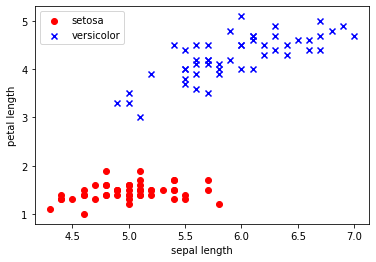

In [11]:
# x축에 Sepal Length, y축에 Petal Length 값으로 그래프를 찍을 예정
# 0~49 행은 setosa, 50~99행은 verscolor 로 되어있다
plt.scatter(features[:50, 0], features[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(features[50:100, 0], features[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [14]:
# 위 코드와 동일한 역할을 수행하는 다른 코드
# 다른 사람의 코드를 보고 이해할 수 있도록 아래 방식에 익숙해져 보자

#### Sequential API
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [15]:
#### Functional API
# input = tf.keras.layers.Input(shape=(2,)) # 입력의 크기 정의 - sepal length, petal length 두개
# output = tf.keras.layers.Dense(1, activation='sigmoid')(input) # 이전 층을 다음층 함수의 입력으로 사용, 변수 할당

# model = tf.keras.models.Model(inputs=input, outputs=output) # Model 함수에 입력, 출력값으로 정의

In [16]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [17]:
model.fit(X_train, y_train, epochs=30)

Epoch 1/30
3/3 [==============================] - 1s 6ms/step - loss: 1.0814 - accuracy: 0.5250
Epoch 2/30
3/3 [==============================] - 0s 8ms/step - loss: 1.0017 - accuracy: 0.5250
Epoch 3/30
3/3 [==============================] - 0s 6ms/step - loss: 0.9433 - accuracy: 0.5250
Epoch 4/30
3/3 [==============================] - 0s 5ms/step - loss: 0.8986 - accuracy: 0.5250
Epoch 5/30
3/3 [==============================] - 0s 5ms/step - loss: 0.8627 - accuracy: 0.5250
Epoch 6/30
3/3 [==============================] - 0s 6ms/step - loss: 0.8413 - accuracy: 0.5250
Epoch 7/30
3/3 [==============================] - 0s 5ms/step - loss: 0.8181 - accuracy: 0.5250
Epoch 8/30
3/3 [==============================] - 0s 7ms/step - loss: 0.8036 - accuracy: 0.5250
Epoch 9/30
3/3 [==============================] - 0s 4ms/step - loss: 0.7901 - accuracy: 0.5250
Epoch 10/30
3/3 [==============================] - 0s 7ms/step - loss: 0.7797 - accuracy: 0.5250
Epoch 11/30
3/3 [======================

In [19]:
model.evaluate(X_test, y_test, verbose=2)

1/1 - 0s - loss: 0.6629 - accuracy: 0.4000 - 103ms/epoch - 103ms/step


[0.6628996133804321, 0.4000000059604645]

In [22]:
# 입력층의 노드 수는? 입력 데이터의 특성수, 2개
# Dense 층의 숫자는 왜 1인가? 출력층이 이진 분류이기 때문, 노드 수는 1로 설정하고, 출력되는 값은 0과 1사이의 확률값
# Dense 층의 activation 은 왜 sigmoid를 주었는가? 출력층이 이진 분류(바이너리 이진분류)라면, 활성화 함수는 sigmoid이다.

In [54]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [55]:
# 이미지 데이터에서는 정규화하는 과정이 중요하다. 꼭!! 빼먹지 말아야 한다!
x_train, x_test = x_train / 255.0, x_test / 255.0

In [56]:
x_train.shape

(60000, 28, 28)

In [57]:
pd.unique(y_train)

array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8], dtype=uint8)

In [37]:
# # 히든 층 1개와 출력층 1개로 모델을 구성한다
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Flatten(input_shape=(28, 28)),
#     tf.keras.layers.Dense(100, activation='relu'),
#     tf.keras.layers.Dense(10, activation='softmax')
# ])

In [60]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [43]:
# # Functional API
# inputs = tf.keras.layers.Input(shape=(28, 28))
# flatten = tf.keras.layers.Flatten()(inputs)
# hidden1 = tf.keras.layers.Dense(100, activation='relu')(flatten)
# output = tf.keras.layers.Dense(10, activation='softmax')(hidden1)

# model = tf.keras.models.Model(inputs=inputs, outputs=output)
# ## 2차원 행렬 데이터를 1차원 행렬로 만들어주기 위해서 Flatten 함수 사용

In [61]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [62]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2740 - accuracy: 0.9220
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1207 - accuracy: 0.9651
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0840 - accuracy: 0.9748
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0638 - accuracy: 0.9807
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0505 - accuracy: 0.9846


In [51]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [58]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [64]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.0899 - accuracy: 0.9719 - 337ms/epoch - 1ms/step


[0.08988988399505615, 0.9718999862670898]

In [65]:
# 입력층의 노드 수? 28 * 28 = 784개
# flatten ? 이미지데이터를 펼쳐주는 역할
# Dense 10인 이유? 출력할 클래스가 0~9 10개의 클래스로 분류할 것이기 때문
# Softmax 를 사용한 이유? 다중분류에서 사용하는 활성화 함수는 softmax